In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
#reading data 
df=pd.read_csv("heart.csv")

# information about data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      302 non-null    float64
 2   chol     302 non-null    float64
 3   fbs      301 non-null    float64
 4   restecg  303 non-null    int64  
 5   thalach  302 non-null    float64
 6   exang    303 non-null    int64  
 7   oldpeak  302 non-null    float64
 8   slope    94 non-null     float64
 9   ca       302 non-null    float64
 10  thal     303 non-null    int64  
 11  target   302 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 28.5 KB


In [4]:
df.isnull().sum()

age          0
sex          1
chol         1
fbs          2
restecg      0
thalach      1
exang        0
oldpeak      1
slope      209
ca           1
thal         0
target       1
dtype: int64

In [5]:
df.describe()

,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,302.000000,302.000000,301.000000,303.000000,302.000000,303.000000,302.000000,94.000000,302.000000,303.000000,302.000000
mean,54.366337,0.682119,246.400662,0.149502,0.528053,149.625828,0.326733,1.038411,1.595745,0.731788,2.313531,0.543046
std,9.082101,0.466426,51.862088,0.357176,0.525860,22.940246,0.469794,1.162816,0.610291,1.023438,0.612277,0.498970
min,29.000000,0.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,2.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.corr()

,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.093427,0.213237,0.120326,-0.116211,-0.398286,0.096801,0.211294,-0.066637,0.279234,0.068001,-0.225630
sex,-0.093427,1.000000,-0.194983,0.048029,-0.056065,-0.050351,0.143460,0.100193,0.010527,0.117098,0.211452,-0.286312
chol,0.213237,-0.194983,1.000000,0.020837,-0.149023,-0.005112,0.065305,0.053245,0.085253,0.069072,0.097594,-0.087044
fbs,0.120326,0.048029,0.020837,1.000000,-0.087325,-0.010357,0.023784,0.004295,-0.035989,0.136726,-0.033491,-0.024350
restecg,-0.116211,-0.056065,-0.149023,-0.087325,1.000000,0.043360,-0.070733,-0.057841,0.183081,-0.074610,-0.011981,0.134874
thalach,-0.398286,-0.050351,-0.005112,-0.010357,0.043360,1.000000,-0.378524,-0.344499,0.261445,-0.210916,-0.097689,0.421333
exang,0.096801,0.143460,0.065305,0.023784,-0.070733,-0.378524,1.000000,0.287774,-0.044800,0.114280,0.206754,-0.435601
oldpeak,0.211294,0.100193,0.053245,0.004295,-0.057841,-0.344499,0.287774,1.000000,-0.514541,0.221999,0.210898,-0.430754
slope,-0.066637,0.010527,0.085253,-0.035989,0.183081,0.261445,-0.044800,-0.514541,1.000000,0.136601,0.107944,NaN
ca,0.279234,0.117098,0.069072,0.136726,-0.074610,-0.210916,0.114280,0.221999,0.136601,1.000000,0.150812,-0.389124



# data visualization

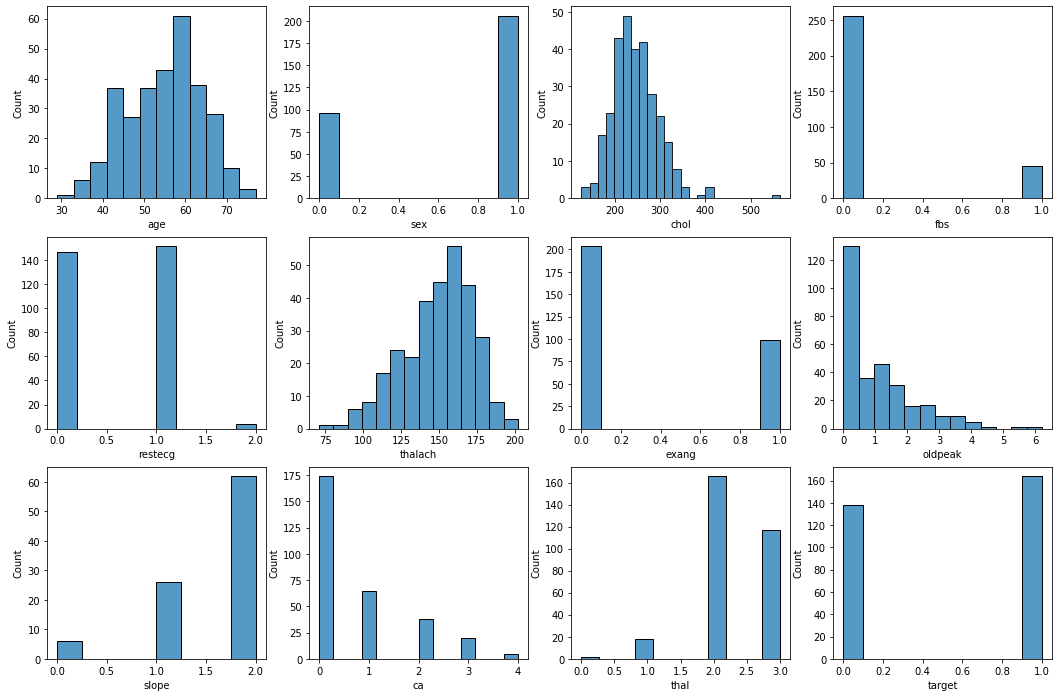

In [7]:
%matplotlib inline
fig, ax = plt.subplots(3,4,figsize=(18,12))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=False ,ax=ax[i//4, i%4])
              
plt.show()
              

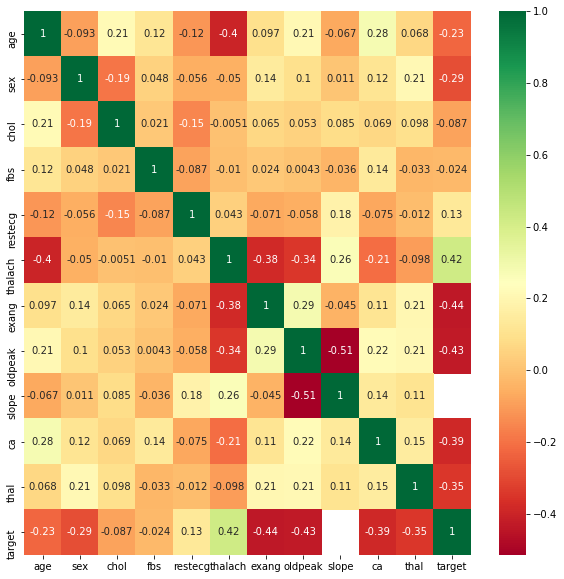

In [8]:
#get correlations of each features in dataset
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data=df.corr(),annot=True,cmap="RdYlGn")

In [9]:
def bar_chart(feature):
    injured = df[df['target']==1][feature].value_counts()
    not_injured = df[df['target']==0][feature].value_counts()
    data=pd.DataFrame([injured,not_injured])
    data.index = ['injured','not_injured']
    data.plot(kind='bar',stacked=True, figsize=(10,5))


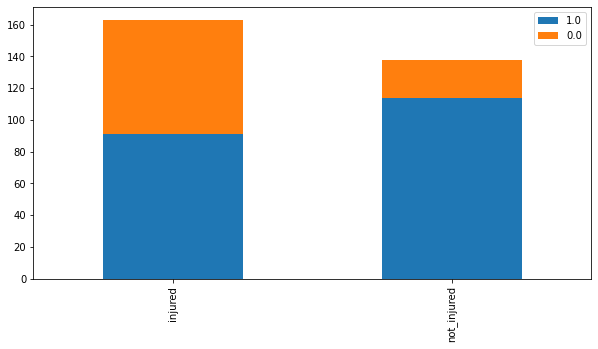

In [10]:
bar_chart('sex' )


In [11]:

df.sex.value_counts()

1.0    206
0.0     96
Name: sex, dtype: int64

In [12]:
#df[df['target'].isin(['1'])]

man more slightly injured than women

corr between injured and sex not strong 


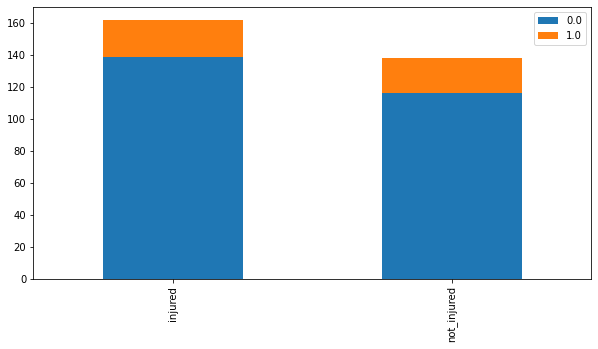

In [13]:
bar_chart('fbs')



most injured have fbs 

most not_injured have fbs 

fbs dosenot have a big role in target

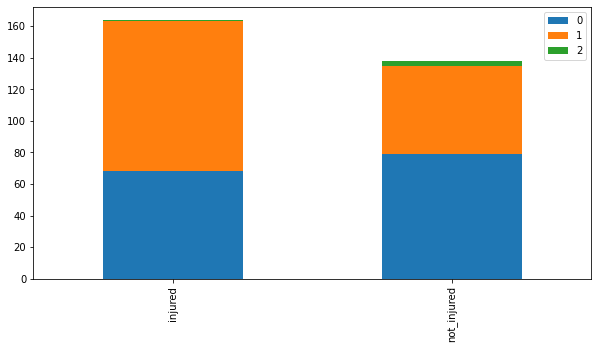

In [14]:
bar_chart('restecg')


In [15]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

most of having ST-T wave abnormality

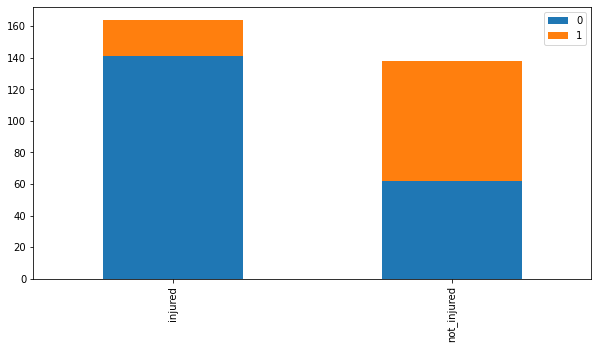

In [16]:
bar_chart('exang')


People who do sports are less likely to have angina pectoris

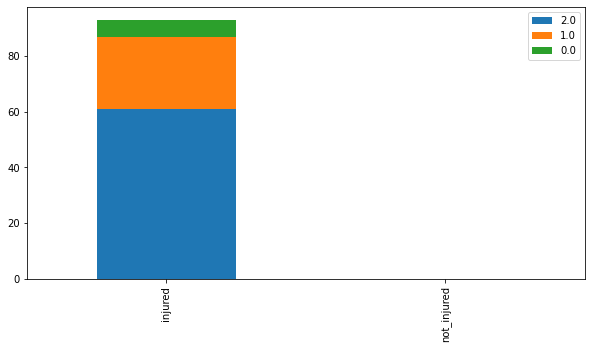

In [17]:
bar_chart('slope')

Most of the injured from regression in STT

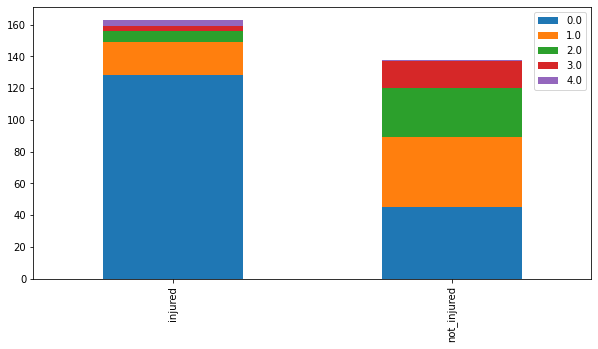

In [18]:
bar_chart('ca')

Most of the injured have zero vessels

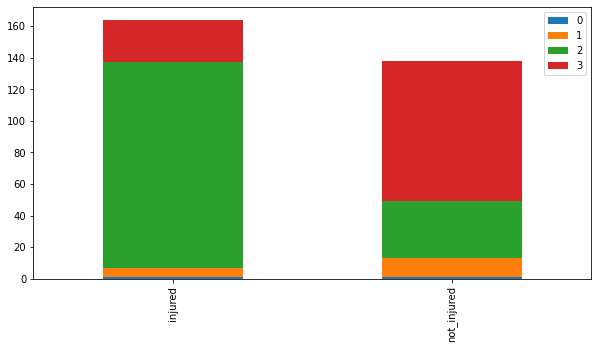

In [19]:
bar_chart('thal')

Most patients have a blood disease

<function matplotlib.pyplot.show(close=None, block=None)>

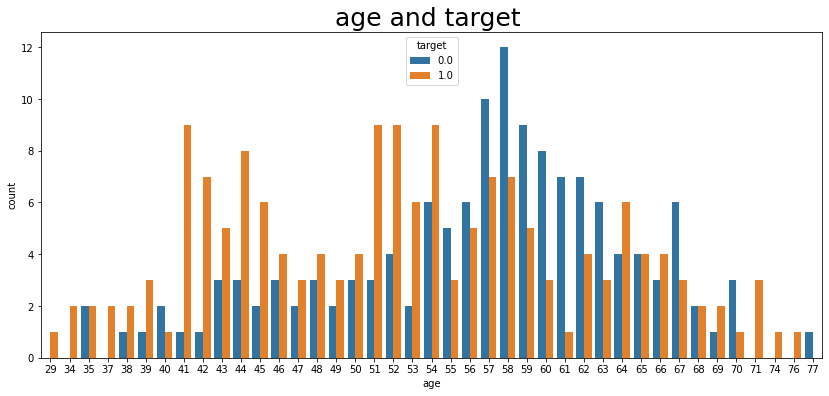

In [20]:
plt.figure(figsize=(14,6))
plt.title("age and target " , fontsize = 25)
sns.countplot(data = df , x = "age" , hue = 'target')
plt.show

Most people at risk of heart disease are under 57 years old

<function matplotlib.pyplot.show(close=None, block=None)>

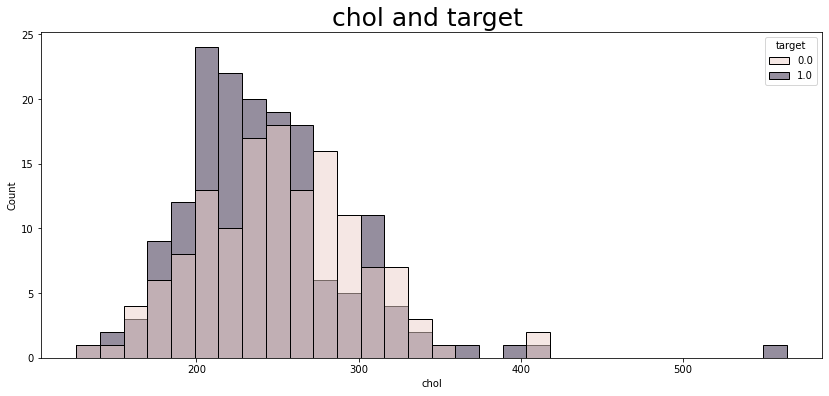

In [21]:
plt.figure(figsize=(14,6))
plt.title("chol and target " , fontsize = 25)
sns.histplot(data = df , x = "chol" , hue = 'target',bins = 30)
plt.show

Most people with heart disease have cholesterol above 200

<function matplotlib.pyplot.show(close=None, block=None)>

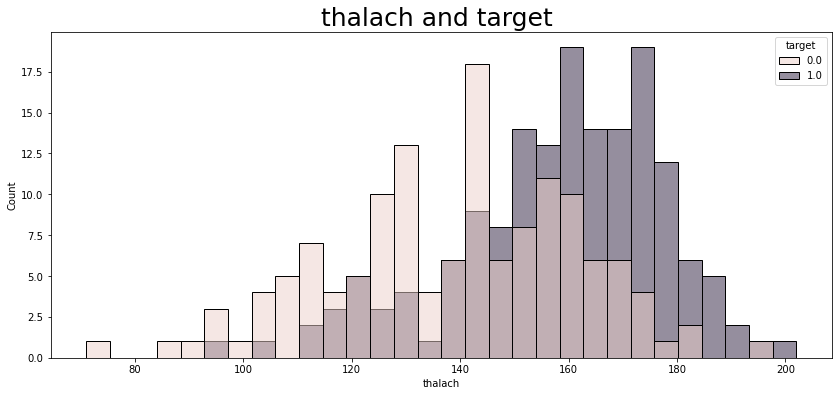

In [22]:
plt.figure(figsize=(14,6))
plt.title("thalach and target " , fontsize = 25)
sns.histplot(data = df , x = "thalach" , hue = 'target',bins = 30)
plt.show

Most patients with heart disease have an abnormality in the blood

# cleaning data

In [23]:
df[df.duplicated()]

,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1.0,175.0,0.0,1,173.0,0,0.0,NaN,4.0,2,1.0


In [24]:
#remove dublicated data
df.drop_duplicates(inplace=True)

In [25]:
df[df.duplicated()]

,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [26]:
#Converting Numerical chol to Categorical Variable
df['cholBand'] = pd.qcut(df['chol'], 4)
df[['cholBand', 'target']].groupby(['cholBand'], as_index=False).mean().sort_values(by='cholBand', ascending=True)


,cholBand,target
0,"(125.999, 211.0]",0.618421
1,"(211.0, 241.0]",0.586667
2,"(241.0, 275.0]",0.526316
3,"(275.0, 564.0]",0.424658


In [27]:
df.loc[df['chol'] <= 211, 'chol'] = 0
df.loc[(df['chol'] >211) & (df['chol'] <=241), 'chol'] = 1
df.loc[(df['chol'] >241) & (df['chol'] <=275), 'chol'] = 2
df.loc[(df['chol'] > 275) & (df['chol'] <=564), 'chol'] = 3  
df.loc[ df['chol'] >  564, 'chol']
df.head()

,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholBand
0,63,1.0,1.0,1.0,0,150.0,0,2.3,0.0,0.0,1,1.0,"(211.0, 241.0]"
1,37,1.0,2.0,0.0,1,187.0,0,3.5,0.0,0.0,2,1.0,"(241.0, 275.0]"
2,41,0.0,0.0,0.0,0,172.0,0,1.4,2.0,0.0,2,1.0,"(125.999, 211.0]"
3,56,1.0,1.0,0.0,1,178.0,0,0.8,2.0,0.0,2,1.0,"(211.0, 241.0]"
4,57,0.0,3.0,0.0,1,163.0,1,0.6,2.0,0.0,2,1.0,"(275.0, 564.0]"


In [28]:
#filling chol based on thal
df["chol"].fillna(df.groupby("thal")["chol"].transform("median"), inplace=True)

In [29]:
df.isnull().sum()

age           0
sex           1
chol          0
fbs           2
restecg       0
thalach       1
exang         0
oldpeak       1
slope       208
ca            1
thal          0
target        1
cholBand      1
dtype: int64

In [30]:
df.chol.value_counts()

2.0    77
0.0    76
1.0    75
3.0    74
Name: chol, dtype: int64

In [31]:
#Converting Numerical thalach to Categorical Variable
df['thalachBand'] = pd.qcut(df['thalach'], 4)
df[['thalachBand', 'target']].groupby(['thalachBand'], as_index=False).mean().sort_values(by='thalachBand', ascending=True)


,thalachBand,target
0,"(70.999, 133.0]",0.263158
1,"(133.0, 152.0]",0.466667
2,"(152.0, 166.0]",0.626667
3,"(166.0, 202.0]",0.810811


In [32]:
df.loc[df['thalach'] <= 133, 'thalach'] = 0
df.loc[(df['thalach'] >133) & (df['thalach'] <=152), 'thalach'] = 1
df.loc[(df['thalach'] >152) & (df['thalach'] <=166), 'thalach'] = 2
df.loc[(df['thalach'] > 166) & (df['thalach'] <=202), 'thalach'] = 3  
df.loc[ df['thalach'] >  202, 'thalach']
df.head()

,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholBand,thalachBand
0,63,1.0,1.0,1.0,0,1.0,0,2.3,0.0,0.0,1,1.0,"(211.0, 241.0]","(133.0, 152.0]"
1,37,1.0,2.0,0.0,1,3.0,0,3.5,0.0,0.0,2,1.0,"(241.0, 275.0]","(166.0, 202.0]"
2,41,0.0,0.0,0.0,0,3.0,0,1.4,2.0,0.0,2,1.0,"(125.999, 211.0]","(166.0, 202.0]"
3,56,1.0,1.0,0.0,1,3.0,0,0.8,2.0,0.0,2,1.0,"(211.0, 241.0]","(166.0, 202.0]"
4,57,0.0,3.0,0.0,1,2.0,1,0.6,2.0,0.0,2,1.0,"(275.0, 564.0]","(152.0, 166.0]"


In [33]:
#fill thalach based on target
df["thalach"].fillna(df.groupby("slope")["thalach"].transform("median"), inplace=True)

In [34]:
#Converting Numerical age to Categorical Variable
df['ageBand'] = pd.qcut(df['age'],4)
df[['ageBand', 'target']].groupby(['ageBand'], as_index=False).mean().sort_values(by='ageBand', ascending=True)


,ageBand,target
0,"(28.999, 48.0]",0.707317
1,"(48.0, 55.5]",0.632353
2,"(55.5, 61.0]",0.350000
3,"(61.0, 77.0]",0.478873


In [35]:
df.loc[df['age'] <= 48, 'age'] = 0
df.loc[(df['age'] >48) & (df['age'] <=56), 'age'] = 1
df.loc[(df['age'] >56) & (df['age'] <=61), 'age'] = 2
df.loc[(df['age'] > 61) & (df['age'] <=77), 'age'] = 3  
df.loc[ df['age'] >  77, 'age']
df.head()

,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholBand,thalachBand,ageBand
0,3,1.0,1.0,1.0,0,1.0,0,2.3,0.0,0.0,1,1.0,"(211.0, 241.0]","(133.0, 152.0]","(61.0, 77.0]"
1,0,1.0,2.0,0.0,1,3.0,0,3.5,0.0,0.0,2,1.0,"(241.0, 275.0]","(166.0, 202.0]","(28.999, 48.0]"
2,0,0.0,0.0,0.0,0,3.0,0,1.4,2.0,0.0,2,1.0,"(125.999, 211.0]","(166.0, 202.0]","(28.999, 48.0]"
3,1,1.0,1.0,0.0,1,3.0,0,0.8,2.0,0.0,2,1.0,"(211.0, 241.0]","(166.0, 202.0]","(55.5, 61.0]"
4,2,0.0,3.0,0.0,1,2.0,1,0.6,2.0,0.0,2,1.0,"(275.0, 564.0]","(152.0, 166.0]","(55.5, 61.0]"


In [36]:
df.isnull().sum()

age              0
sex              1
chol             0
fbs              2
restecg          0
thalach          0
exang            0
oldpeak          1
slope          208
ca               1
thal             0
target           1
cholBand         1
thalachBand      1
ageBand          0
dtype: int64

In [37]:
df.fbs.value_counts()

0.0    255
1.0     45
Name: fbs, dtype: int64

In [38]:
#filling fbs based on age
df["fbs"].fillna(df.groupby("age")["fbs"].transform("median"), inplace=True)

In [39]:
df.fbs.value_counts()

0.0    257
1.0     45
Name: fbs, dtype: int64

In [40]:
df.sex.value_counts()

1.0    205
0.0     96
Name: sex, dtype: int64

In [41]:
#filling sex based on exang
df["sex"].fillna(df.groupby("exang")["sex"].transform("median"), inplace=True)

In [42]:
#filling target based on restecg
df["target"].fillna(df.groupby("restecg")["target"].transform("median"), inplace=True)

In [43]:
#filling oldpeak based on thal
df["oldpeak"].fillna(df.groupby("thal")["oldpeak"].transform("median"), inplace=True)


In [44]:
#filling ca based on age 
df["ca"].fillna(df.groupby("age")["ca"].transform("median"), inplace=True)

In [45]:
df.ca.value_counts()

0.0    174
1.0     66
2.0     38
3.0     20
4.0      4
Name: ca, dtype: int64

In [46]:
df.drop(['cholBand','thalachBand','ageBand'],axis=1,inplace=True)



In [47]:
#filling slope based on restecg
df["slope"].fillna(df.groupby("restecg")["slope"].transform("median"), inplace=True)

In [48]:
df[df['slope'].isnull()>0]


,age,sex,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
144,3,0.0,0.0,0.0,2,0.0,0,1.1,NaN,0.0,2,1.0
266,1,0.0,3.0,0.0,2,0.0,1,3.4,NaN,0.0,2,0.0
289,1,0.0,0.0,0.0,2,0.0,1,2.0,NaN,1.0,3,0.0
291,2,1.0,3.0,0.0,2,1.0,0,4.4,NaN,3.0,1,0.0


In [49]:
#deleting NaN values from df
df.drop([144,266,289,291],axis=0,inplace=True)

In [50]:
df.isnull().sum()


age        0
sex        0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
y = df['target']
X = df.drop(['target'], axis = 1)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'chol', 'thalach', 'oldpeak']

df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [54]:
from sklearn.model_selection import cross_val_score
knn_scores = []

for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
    

In [55]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()


0.7983908045977012